In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


dataPrice = pd.read_csv('price_availability.csv', sep=';')
dataListing = pd.read_csv('listings_final.csv', sep=';')

In [3]:
dataListing.head()

,Unnamed: 0,listing_id,name,type,city,neighborhood,latitude,longitude,person_capacity,beds,bedrooms,bathrooms,is_rebookable,is_new_listing,is_fully_refundable,is_host_highly_rated,is_business_travel_ready,pricing_weekly_factor,pricing_monthly_factor
0,0,28581061,La maison Clery,private_room,Paris,2e arrondissement,48.869292,2.348335,1,1,1,2.0,False,True,True,False,False,1.00,1.00
1,1,661961,studio PARIS PLACE EDITH PIAF 75020,entire_home,Paris,NaN,48.867284,2.403255,2,1,1,1.0,False,False,True,True,False,0.88,0.69
2,2,1261705,chambre privée à louer @ paris oberkampf,private_room,Paris,NaN,48.867894,2.375897,1,1,1,1.0,False,False,True,True,False,1.00,1.00
3,3,1318834,Appartement au coeur du Marais,entire_home,Paris,République,48.870370,2.358510,3,2,2,1.0,False,False,True,False,False,0.82,0.48
4,4,1677091,Lovely & Quiet flat,entire_home,Paris,Buttes-Chaumont - Belleville,48.874149,2.373700,2,1,1,1.0,False,False,True,True,False,0.95,0.90


In [2]:
df = dataPrice.join(dataListing, lsuffix='listing_id', rsuffix='listing_id')
df

,listing_idlisting_id,day,created,available,local_currency,local_price,min_nights,Unnamed: 0,listing_idlisting_id,name,...,beds,bedrooms,bathrooms,is_rebookable,is_new_listing,is_fully_refundable,is_host_highly_rated,is_business_travel_ready,pricing_weekly_factor,pricing_monthly_factor
0,9810829,2018-12-08,2018-09-27 06:14:10.000+0000,True,EUR,160,1,0.0,28581061.0,La maison Clery,...,1.0,1.0,2.0,False,True,True,False,False,1.00,1.00
1,9810829,2018-12-08,2018-09-26 19:34:02.000+0000,True,EUR,160,1,1.0,661961.0,studio PARIS PLACE EDITH PIAF 75020,...,1.0,1.0,1.0,False,False,True,True,False,0.88,0.69
2,20897010,2018-12-09,2018-09-27 10:38:57.000+0000,True,EUR,172,2,2.0,1261705.0,chambre privée à louer @ paris oberkampf,...,1.0,1.0,1.0,False,False,True,True,False,1.00,1.00
3,20897010,2018-12-09,2018-09-27 06:10:27.000+0000,True,EUR,172,2,3.0,1318834.0,Appartement au coeur du Marais,...,2.0,2.0,1.0,False,False,True,False,False,0.82,0.48
4,20897010,2018-12-09,2018-09-26 19:30:25.000+0000,True,EUR,172,2,4.0,1677091.0,Lovely & Quiet flat,...,1.0,1.0,1.0,False,False,True,True,False,0.95,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4748691,23608395,2018-09-06,2018-09-27 06:05:42.000+0000,False,EUR,24,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4748692,23608395,2018-09-06,2018-09-26 19:31:32.000+0000,False,EUR,24,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4748693,1447132,2018-12-27,2018-09-27 10:46:16.000+0000,False,EUR,125,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4748694,1447132,2018-12-27,2018-09-27 06:07:36.000+0000,False,EUR,125,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df.loc[:, ~df.columns.duplicated()]
df = df.groupby('listing_idlisting_id').mean()
df

,available,local_price,min_nights,Unnamed: 0,latitude,longitude,person_capacity,beds,bedrooms,bathrooms,pricing_weekly_factor,pricing_monthly_factor
listing_idlisting_id,,,,,,,,,,,,
5396,0.011494,102.363985,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7397,0.168297,110.107632,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9342,0.309198,396.863014,2.784736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10010,0.254593,136.154856,4.955381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10270,0.511688,105.779221,4.937662,159.0,48.855684,2.33971,2.0,1.0,0.333333,1.0,0.95,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...
28836096,0.082707,321.428571,1.022556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28838519,0.083333,54.483333,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28840013,0.743083,112.122530,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(0.0, 3000.0)

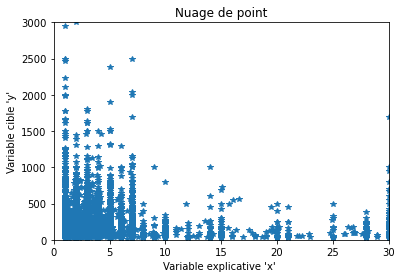

In [23]:
plt.plot(df['min_nights'],df['local_price'], '*')
plt.xlabel("Variable explicative 'x' ")
plt.ylabel("Variable cible 'y'")
plt.title("Nuage de point")
plt.xlim([0, 30])  
plt.ylim([0, 3000])

In [31]:
from sklearn import LinearRegression

price = df.loc[:, 'local_price']
price

listing_idlisting_id
5396        102.363985
7397        110.107632
9342        396.863014
10010       136.154856
10270       105.779221
               ...    
28836096    321.428571
28838519     54.483333
28840013    112.122530
28846494    168.037594
28851976    128.000000
Name: local_price, Length: 11749, dtype: float64